# Clusterização

- Execute os algoritmos de agrupamento K-means e Hierárquico com diferentes valores de clusters e escolha o melhor resultado.

Para o hierárquico, varie entre o single e complete linkage e analise os resultados obtidos.

Para o k-means, inicialize os centroides aleatoriamente e avalie o impacto da inicialização nos resultados encontrados. 

Bônus: normalizar os dados e executar novamente os algoritmos para analisar os resultados gerados.
Fazer visualização dos clusters encontrados com PCA ou t-SNE.

# Bibliotecas

In [32]:
from scipy import stats
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, decomposition, cluster, model_selection, metrics, manifold

# Base de Dados

In [5]:
df_base = pd.read_csv('Live.csv')
df_base

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# Verificando a Base de Dados

# Informações Gerais

In [6]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


A base de dados possui tanto dados numéricos como dados não numéricos. Se faz necessário analizar os atributos, principalmente os não numéricos, pois se tiverem relevância, eles serão convertidos para valores numéricos.

# Dados Faltosos

In [7]:
df_base.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

A base de dados possui 4 atributos(**Column1, Column2, Column3 e Column4**)  do qual, em todas as suas instâncias, está faltando dados. O ideal é remover esses atributos.

In [8]:
df_base = df_base.drop(columns=['Column1','Column2','Column3','Column4'])
df_base.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


## Dados Duplicados

In [9]:
df_base.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
7045    False
7046    False
7047    False
7048    False
7049    False
Length: 7050, dtype: bool

A base de dados não possui dados duplicados. 

## Dados Não Numéricos

In [10]:
print("Valores não numéricos presentes em 'status_id':",df_base['status_id'].unique(), "\n\n")
print("Valores não numéricos presentes em 'status_type':",df_base['status_type'].unique(), "\n\n")
print("Valores não numéricos presentes em 'status_published':",df_base['status_published'].unique(), "\n\n")

Valores não numéricos presentes em 'status_id': ['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528'] 


Valores não numéricos presentes em 'status_type': ['video' 'photo' 'link' 'status'] 


Valores não numéricos presentes em 'status_published': ['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30'] 




Agora vamos verificar cada atributos não numérico, para decidir se eles devem permanecer na base de dados ou não.

### status_published

Esse atributo traz a informação da **data e hora** que uma publicação foi feita. Ele será divido em 4 abritutos (**ano, mês, dia e minutos**). A hora será toda quantificada em minutos, para evitar problemas, com a quebra da hora em 'hora e minutos'.  

In [11]:
df_base['status_published'] = pd.to_datetime(df_base['status_published'])
df_base['year'] = df_base['status_published'].dt.year
df_base['month'] = df_base['status_published'].dt.month
df_base['day'] = df_base['status_published'].dt.day
df_base['minutes'] = df_base['status_published'].dt.minute + (df_base['status_published'].dt.hour)*60
df_base.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,360
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,1365
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,377
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,149
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,202


Sendo assim, não é mais necessário manter **status_published** na base de dados.

In [12]:
df_base = df_base.drop(columns=['status_published'])
df_base.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018,4,22,360
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018,4,21,1365
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018,4,21,377
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018,4,21,149
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018,4,18,202


### status_type

Esse dado mostra o tipo de publicação que foi feita. Lidar com esse dado na forma não numérica pode ser trabalhosa. Sendo assim, o ideal é transformar essas instâncias para valores numéricos.

In [13]:
one_hot = pd.get_dummies(df_base['status_type'])
df_base = df_base.drop(columns=['status_type'])
df_base =df_base.join(one_hot)
df_base.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,2018,4,22,360,0,0,0,1
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,2018,4,21,1365,0,1,0,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,2018,4,21,377,0,0,0,1
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,2018,4,21,149,0,1,0,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,2018,4,18,202,0,1,0,0


### status_id

Esse atributo, possivelmente é relacionado a identificar uma publicação na base de dados. Por ser um atributo difícil de categorizar, por dificuldades em realizar alguma transformações sobre esse abributo, ele será removido da base de dados.

In [14]:
df_base = df_base.drop(columns=['status_id'])
df_base.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,2018,4,22,360,0,0,0,1
1,150,0,0,150,0,0,0,0,0,2018,4,21,1365,0,1,0,0
2,227,236,57,204,21,1,1,0,0,2018,4,21,377,0,0,0,1
3,111,0,0,111,0,0,0,0,0,2018,4,21,149,0,1,0,0
4,213,0,0,204,9,0,0,0,0,2018,4,18,202,0,1,0,0


# Análise da Distribuição dos Dados

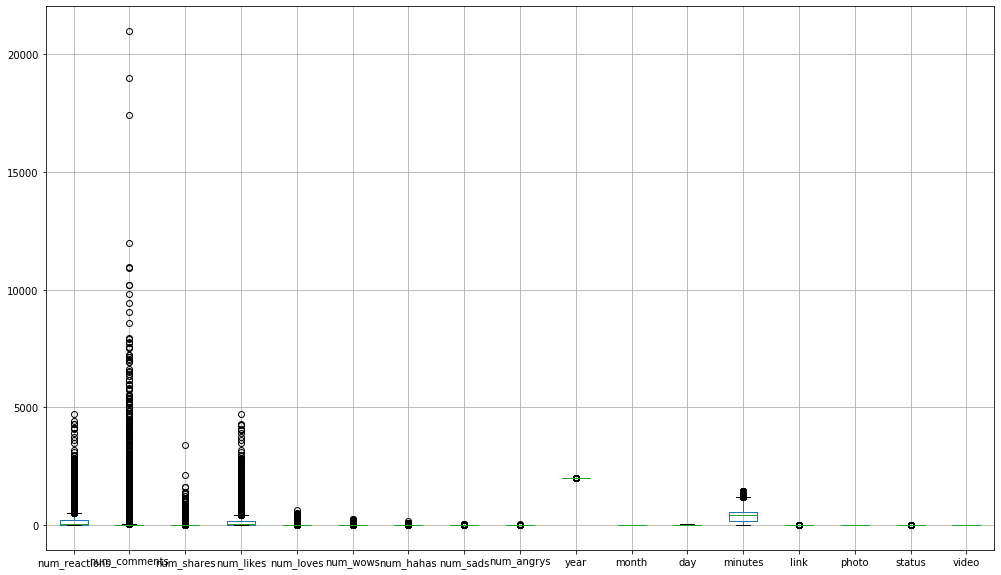

In [15]:
plt.figure(figsize=(17,10))
df_base.boxplot()

# Correlação

In [16]:
correl = df_base.corr()
correl.style.background_gradient(cmap = 'coolwarm')


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
num_reactions,1,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,-0.0427028,-0.114712,-0.0062918,0.0178428,0.0287431,-0.131515,0.105402,0.0810458
num_comments,0.150843,1,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,0.132399,0.021358,-0.00940208,3.20677e-05,-0.0233404,-0.291846,-0.0494132,0.330662
num_shares,0.250723,0.640637,1,0.172492,0.82,0.407628,0.399826,0.19997,0.312513,0.189782,-0.0234997,-0.0115132,-0.0548522,-0.0257077,-0.35478,-0.0665244,0.404473
num_likes,0.994923,0.101687,0.172492,1,0.209308,0.2078,0.120784,0.0521688,0.0874307,-0.0655282,-0.111233,-0.00683828,0.022587,0.0326584,-0.100537,0.114631,0.0437844
num_loves,0.305003,0.521223,0.82,0.209308,1,0.508798,0.50783,0.2076,0.371001,0.204702,-0.0598967,0.00189731,-0.0466167,-0.0295229,-0.351741,-0.0652826,0.401499
num_wows,0.267752,0.162394,0.407628,0.2078,0.508798,1,0.287756,0.0865027,0.183087,0.10153,-0.062339,0.00983615,-0.00300556,-0.0119677,-0.0864089,-0.00312909,0.093498
num_hahas,0.176028,0.325048,0.399826,0.120784,0.50783,0.287756,1,0.141421,0.21191,0.113236,-0.0382838,0.00407524,-0.00784123,-0.0159515,-0.159237,-0.034656,0.184682
num_sads,0.075138,0.236453,0.19997,0.0521688,0.2076,0.0865027,0.141421,1,0.142072,0.0674456,0.0230398,-0.00321292,0.0213773,-0.0144891,-0.0789529,0.020866,0.0749706
num_angrys,0.124326,0.225184,0.312513,0.0874307,0.371001,0.183087,0.21191,0.142072,1,0.100654,-0.0265553,-0.0131156,-0.0143484,-0.0147893,-0.115695,-0.0284652,0.13637
year,-0.0427028,0.132399,0.189782,-0.0655282,0.204702,0.10153,0.113236,0.0674456,0.100654,1,-0.230947,-0.04859,-0.033359,0.00769973,-0.209002,0.0393799,0.196716


Analisando as correlações, os atributos mais correlacionados, são: num_reactions com num_likes, num_shares com num_loves, num_comments com num_shares, num__comments com num_loves,  e num_loves com num_woos.

# Algoritmos de Agrupamento sem Normalização

Como requisitado, primeiro serão executados os algoritmos de agrupamento, K-means e Hierárquico(single e complete linkage), sem a normalização dos dados. 
Para todos os casos os algoritmos erão executados com uma variação de número de clusters de 2 a 15.
A métrica de avalição utilizada é a "silhouette". Métrica esta que 

OBS: No K-means os centroídes serão inicializados de forma aleatória. 

OBS: Os outilers não foram tratados.



In [27]:
silhueta = []
intera = [i**2 for i in range (2, 10)]

for n in intera:
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(df_base)
    
    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
    
    cluster_kmeans = df_base.assign(cluster_numero = kmeans_r.predict(df_base))
    
    cluster_hierarquico_simples = df_base.assign(cluster_numero = hierarquico_simples.fit_predict(df_base)) 
    cluster_hierarquico_completo = df_base.assign(cluster_numero = hierarquico_completo.fit_predict(df_base))
    
    
    silhueta.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})
    
    
   

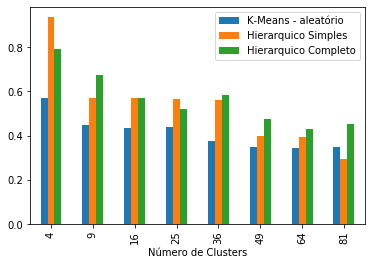

In [28]:
pd.DataFrame(silhueta).plot.bar(x="Número de Clusters",
                                        y =["K-Means - aleatório","Hierarquico Simples","Hierarquico Completo"])
    

balablablablablabalbalbalbalbalb

# Normalização 

Como requisitado, primeiro foi executado os algorimtos de agrupamento sem a normalização. Agora será feita a normalização dos dados, e os mesmos algoritmos serão reexecutados.

In [21]:
normal = preprocessing.RobustScaler() #lida melhor com outleirs

normalizacao = pd.DataFrame(normal.fit_transform(df_base),columns = df_base.columns.values)

normalizacao.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0.5,-0.285714,0.400000,-0.159705,0.0,-1.0,0.0,1.0
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,2.309582,0.0,0.0,0.0,0.0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0.5,-0.285714,0.333333,-0.117936,0.0,-1.0,0.0,1.0
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,-0.678133,0.0,0.0,0.0,0.0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.133333,-0.547912,0.0,0.0,0.0,0.0


# Algoritmos de Agrupamento com Normalização

In [29]:
silhuet = []

for n in intera:
    
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(normalizacao)
    
    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
    
    cluster_kmeans = normalizacao.assign(cluster_numero = kmeans_r.predict(normalizacao))
    
    cluster_hierarquico_simples = normalizacao.assign(cluster_numero = hierarquico_simples.fit_predict(normalizacao)) 
    cluster_hierarquico_completo = normalizacao.assign(cluster_numero = hierarquico_completo.fit_predict(normalizacao))
    
    
    silhuet.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})
    

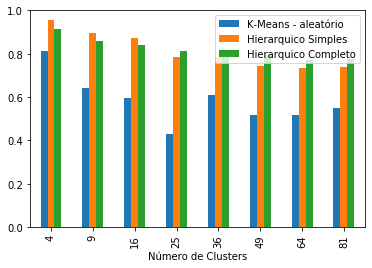

In [30]:
pd.DataFrame(silhuet).plot.bar(x="Número de Clusters",
                                        y =["K-Means - aleatório","Hierarquico Simples","Hierarquico Completo"])

# Visualização dos Clusters

os dados visualizados serão dos dados normalizados!